In [71]:
import pandas as pd
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

In [95]:
data=[]
for i in range(200):
    data.append(np.random.randint(low=1, high=100, size=2))
data = pd.DataFrame(data)
data.columns =['col1','col2']
data.head()

,col1,col2
0,5,13
1,75,12
2,34,83
3,98,31
4,34,45


In [96]:
k=int(input('enter value of k'))
t=int(input('enter value of t'))

enter value of k4
enter value of t15


In [97]:
initial= rd.sample([i for i in range(len(data))], k)


In [98]:
def distance(kmid,d):
    dist=[]
    for i in kmid:
        q=[]
        for j in range(len(d)):
            p=d.iloc[j:j+1].values
            p=p[0]
            dis=0            
            for l in range(len(p)):
                dis=dis+abs(i[l]-p[l])
            q.append(dis)
        dist.append(q)
    return dist

def cost(dis_matrix):
    index=[]
    cost=[]
    for i in range(len(dis_matrix[0])):
        temp=[]
        for j in range(len(dis_matrix)):
            temp.append(dis_matrix[j][i])
        index.append(temp.index(min(temp)))
        cost.append(min(temp))   
    return cost,index

In [99]:
# k medoids
def pam(x_data,k,t):
    cluster=[]
    initial= rd.sample([i for i in range(len(x_data))], k)
    for i in initial:
        p=x_data.iloc[i:i+1].values
        p=p[0]
        cluster.append(p)
    dis_matrix=distance(cluster,x_data)
    cost_v,index=cost(dis_matrix)
    
    for i in range(t):
        random_point=rd.randint(0,len(x_data)-1)
        random_choice=rd.randint(0,k-1)
        new_data=x_data.iloc[random_point:random_point+1].values
        new_data=new_data[0]
        cluster[random_choice]=new_data
        dis_matrix=distance(cluster,x_data)
        cost_v1,index1=cost(dis_matrix)
        if sum(np.subtract(np.array(cost_v1),np.array(cost_v)))<0:
            cost_v=np.copy(np.array(cost_v1))
    return sum(cost_v),cluster,index1
    

In [100]:
no_of_sample=int(input('enter no of sample'))

enter no of sample10


In [101]:
#clara
cost_m=[]
index=[]
centroid=[]
for i in range(no_of_sample):
    sample=data.sample(n=int(len(data)/5))
    sample=sample.reset_index()
    sample=sample.iloc[:,1:len(sample.columns)]
    p,mid,ind=pam(sample,k,t)
    cost_m.append(p)
    centroid.append(mid)
    index.append(ind)

In [102]:
min_cost=min(cost_m)
cluster=centroid[cost_m.index(min_cost)]
distanc=distance(cluster,data)
cost,index=cost(distanc)

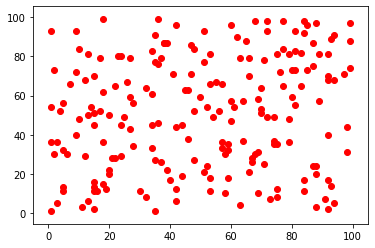

In [103]:
for i in range(len(data)):
    x=data.iloc[i:i+1,0:1].values
    y=data.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], c='r', label='data')
plt.show()

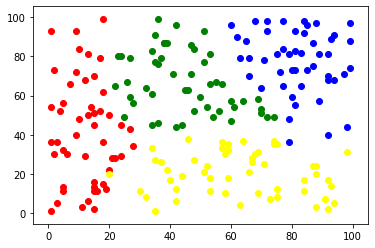

In [104]:
color=['red','blue','yellow','green','cyan','purple']
for i in range(len(data)):
    x=data.iloc[i:i+1,0:1].values
    y=data.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], color=color[index[i]])
plt.show()